In [35]:
# Initialize Otter
import otter
grader = otter.Notebook("lab04.ipynb")

<table style="width: 100%;">
    <tr style="background-color: transparent;"><td>
        <img src="https://data-88e.github.io/assets/images/blue_text.png" width="250px" style="margin-left: 0;" />
    </td><td>
        <p style="text-align: right; font-size: 10pt;"><strong>Economic Models</strong>, Fall 2024<br>
            Dr. Eric Van Dusen <br>
            Notebook by: Umar Maniku <br>
            Rohan Jha <br>
            Akhil Venkatesh</p></td></tr>
</table>

# Lab 4: The Cobb-Douglas Production Function

In [36]:
from utils import *
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
import seaborn as sns
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import display
#import nbinteract as nbi
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
plt.style.use("seaborn-v0_8-muted")

## Part 1: Production and Cobb-Douglas Functions in Macroeconomics

### The Cobb-Douglas Production Function

The Cobb-Douglas Production Function is as follows:
$$
f(K, L) = K^\alpha L^\beta \\
Y = A \cdot f(K, L) = A K^\alpha L^\beta
$$
where $\alpha$ and $\beta$ are exponents.

A common simplification is that $\beta = 1 - \alpha$. We will later explore the implications of this statement. For now, let us rewrite the above function:

$$
Y = A K^\alpha L^{1 - \alpha}
$$

Note that this is a function of two variables, $K$ and $L$. If we were to plot this function utilizing both variables, we would need a 3D plot with $K$, $L$ and $Y$ each having their own axis. For now, let us gain greater insight into what this function would look like by holding one variable constant and plot the other versus output.

For the first case, let us visualize the Cobb-Douglas Production Function with output as a function of capital, holding the amount of labor constant at $\bar L$.

**Question 1.1** Define ```cobb_douglas```, a function that calculates output using the Cobb-Douglas function. This should work for constant, decreasing and increasing returns to scale. We have provided an ```if-else``` structure to faciliate your implementation. Note that the syntax `beta = None` tells Python that the default argument for the `beta` argument is the value `None`. This is not a number, so you'll need to handle this case.

_Hint:_ When do we substitute $\beta = 1 - \alpha$?


In [37]:
def cobb_douglas(A, K, L, alpha, beta = None):
    if beta == None:
        return cobb_douglas(A, K, L, alpha, 1-alpha)
    else:
        return A*(K**alpha)*(L**beta)

In [38]:
grader.check("q1_1")

q1_1 results: All test cases passed!

<!-- BEGIN QUESTION -->

**Question 1.2** Now let's plot Cobb-Douglas as a function of the capital stock, holding labor constant at $\bar L$. To do this, we'll need to write a function called `cobb_douglas_plotter_K` that takes in the Cobb-Douglas model parameters to create an array of values for $Y$ called `Y_s`. In the function body, fill in the correct values for `K_s` and `Y_s`. `K_s` should be an array of the possible values of $K$ in the range $[0, 1]$ using intervals of 0.01. When you have completed the function, call it using $A = 1$, $\bar L = 0.5$, and $\alpha = 0.4$.

_Hint:_ Your `cobb_douglas` function can take any of its parameters as an array.


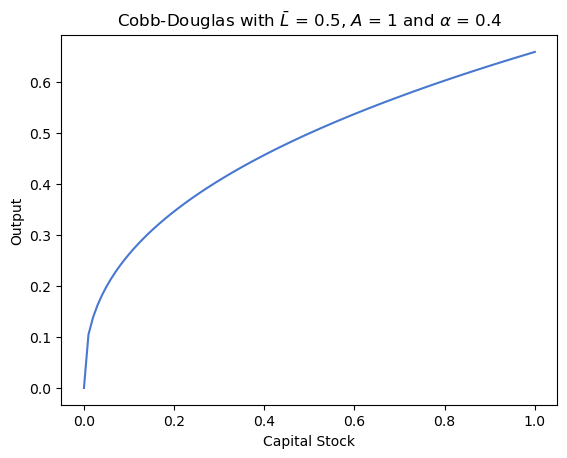

In [39]:
def cobb_douglas_plotter_K(A, L_bar, alpha):
    K_s = np.arange(0, 1.01, 0.01)
    Y_s = cobb_douglas(A, K_s, L_bar, alpha)
    
    ### Do not edit the code below; this does the plotting ###
    plt.plot(K_s, Y_s)
    plt.title(fr"Cobb-Douglas with $\bar L$ = {L_bar}, $A$ = {A} and $\alpha$ = {alpha}")
    plt.xlabel("Capital Stock")
    plt.ylabel("Output");


cobb_douglas_plotter_K(1, 0.5, 0.4)

<!-- END QUESTION -->

If you defined the function correctly, you should notice some of the properties in the graph above:
1. It is increasing. This is called increasing returns to capital wherein any increase in capital will lead to an increase in output, assuming that labor is held constant.
2. It is concave (increasing at a decreasing rate). This is called diminishing marginal returns to capital wherein any additional unit of capital will lead to smaller and smaller increases in capital.

We can do the same thing but instead holding capital constant and letting labor vary.

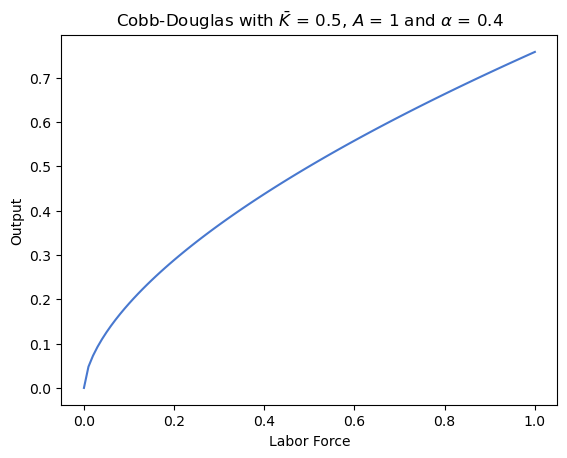

In [40]:
cobb_douglas_plotter_L(1, 0.5, 0.4)

We notice that the same properties hold: the function is exhibiting both increasing returns to labor and diminishing marginal returns to labor. This is because we selected the same parameters as when we plotted output versus capital stock. The cell below has the same function call, but try using different parameters and observe what happens to its shape.

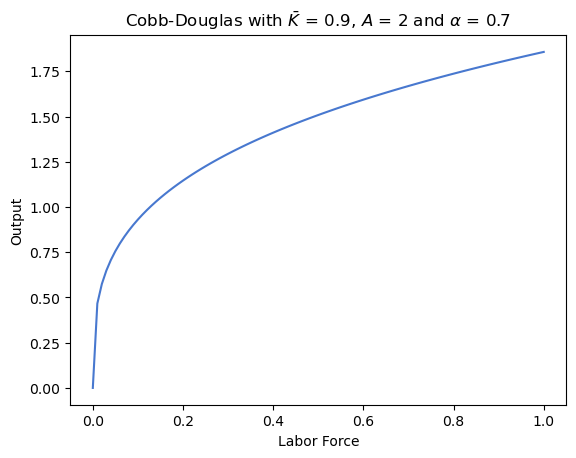

In [41]:
# Change the parameters below
# First parameter: alpha, Second parameter: Fixed value of K, Third parameter: beta

cobb_douglas_plotter_L(2, 0.9, 0.7)

### Implications for cross-country comparisons

Work by Professors C.W. Cobb and P.H. Douglas found that production or output was a weighted average of the log of capital and labor. The equation for Cobb-Douglas production functions were the result of their research, especially when a log transformation was applied to the equation:

$$\begin{aligned}
Y &= A K^\alpha L^{1 - \alpha} \\
\ln Y &= \ln A + \alpha \ln K + (1 - \alpha) \ln L
\end{aligned}
$$

Note that this is exactly the weighted average that the two Professors found in their empirical findings: capital and labor are weighted by $\alpha$ and $1 - \alpha$ respectively. However, this is still showing production as a function of two variables, $K$ and $L$. Rearranging the equation yields something interesting:

$$\begin{aligned}
\ln Y &= \ln A + \alpha \ln K + \ln L - \alpha \ln L \\
\ln Y- \ln L &= \ln A + \alpha \ln K - \ln L \\
\ln \dfrac{Y}{L} &= \ln A + \alpha \ln \dfrac{K}{L}
\end{aligned}
$$

The Cobb-Douglas function is now an equation in 1 variable: $\ln \frac{K}{L}$, making it linear instead of exponential.

**Question 1.3** Now that we have linearly transformed Cobb-Douglas, how can we use the function defined above to recover $A$ and $\alpha$ values for a country? More specifically, how could you get the values for $A$ and $\alpha$ when presented with a plot of $\ln \dfrac{K}{L}$ vs. $\ln \dfrac{Y}{L}$?

<ol type="A" style="list-style-type: lower-alpha;">
    <li>$\alpha$ is the intercept of the plot; $A$ is the slope of the plot.</li>
    <li>To get $A$, exponentiate the intercept; $\alpha$ is the slope of the plot.</li>
    <li>$A$ is the intercept of the plot; $\alpha$ is the slope of the plot.</li>
    <li>To get $\alpha$, exponentiate the slope; $A$ is the intercept of the plot.</li>
</ol>

Assign the letter corresponding to your answer to `q1_3` below.


In [42]:
q1_3 = 'b'

In [43]:
grader.check("q1_3")

q1_3 results: All test cases passed!

Now that you've identified a process of capturing all parts of the Cobb-Douglas function, we are now able to compare  values of $A$ and $\alpha$ between countries, and by extension how capital and labor are deployed in different ways between nations. We will now learn about the significance of $A$ and $\alpha$ in the sections below. The upcoming project will have you try this on a broad range of nations from 1990 to 2019.

### Shifts in $A$ and its effect on output

In [44]:
A_slider = widgets.FloatSlider(min = 0.5, max = 10, step = 0.5, value = 1)
display(widgets.interactive(change_A, A = A_slider))

interactive(children=(FloatSlider(value=1.0, description='A', max=10.0, min=0.5, step=0.5), Output()), _dom_cl…

Supply or total factor productivity shocks could cause $A$ to change. These occur if there is a change in total output for a given level of capital and labor. Examples of these include financial crises, technology shocks, natural environment/disasters and energy prices. 

Favorable shocks rotate the production function upward through an increase in $A$. Thus, each unit of input from capital and labor now simultaneously produce more output. What does this mean for the rental rate of capital and the real wage? Recall the functions for both of them:

$$\begin{aligned}
MPL &= \dfrac{\partial Y}{\partial L} \\
&= A (1 - \alpha) \left ( \dfrac{K}{L} \right )^{\alpha} \\
MPK &= \dfrac{\partial Y}{\partial K} \\
&= \alpha A \left ( \dfrac{L}{K} \right )^{1 - \alpha} \\
\end{aligned}
$$

Both MPK and MPL will increase by a factor of $A$. Thus, it would be more expensive to hire an additional unit of labor or rent an additional unit of capital. As they are both more productive than they previously were, they are both more valuable to a business and thus will cost more.


Negative shocks do the opposite. They rotate the production function downward through a decrease in $A$. Each unit of input is now less productive, meaning that both the rental rate of capital and the real wage are lower.

<!-- BEGIN QUESTION -->

**Question 1.4.** Give at least one example of an event, government program or activity that can change or has changed a country's $A$ or Total Factor Productivity for better or worse. In at least one sentence, explain why you selected that event.


_The "invention" of the production line was one major event that greatly changed the Total Factor Productivity for the United States (and many other countries soon after). By switching to this style of production, workers were able to specialize in one action, allowing for greater production in the same amount of time thanks to the relative ease of repition._

<!-- END QUESTION -->

### Differences in $\alpha$ and their effects on output

In [45]:
alpha_slider = widgets.FloatSlider(min = 0.1, max = 1, step = 0.1, value = 0.5)
display(widgets.interactive(change_alpha, alpha = alpha_slider))

interactive(children=(FloatSlider(value=0.5, description='alpha', max=1.0, min=0.1), Output()), _dom_classes=(…

$\alpha$ and $\beta$ are called the output elasticities of capital and labor, respectively. They measure the responsiveness of output to a change in the levels of either labor or capital, holding all else constant. This means that if $\alpha$ or $\beta$ were high, then any small increase in their respective input would lead to a relatively large increase in output. As an example, if $\alpha$ were 0.4, then a 1% increase in capital would lead to a 0.4% increase in output.

**Question 1.5.** Let's link this back to Cobb-Douglas' simplifying assumption of constant returns to scale. Recall that this means $\alpha = 1 - \beta$. If a nation has a high $\alpha$, what does this mean about how resources are allocated?

<ol type="A" style="list-style-type: lower-alpha;">
    <li>The higher the $\alpha$, the more efficient a country's production is.</li>
    <li>The higher the $\alpha$, the larger the labor force of the country.</li>
    <li>The higher the $\alpha$, the more labor-intensive a country's production is.</li>
    <li>The higher the $\alpha$, the more capital-intensive a country's production is.</li>
</ol>

Assign the letter corresponding to your answer to `q1_5` below.


In [46]:
q1_5 = 'd'

In [47]:
grader.check("q1_5")

q1_5 results: All test cases passed!

### Returns to scale

The significance of the exponents adding up to 1, i.e. $\alpha + \beta = 1$, is that this implies **constant returns to scale**. If all inputs are scaled by a common non-zero factor, the output will be scaled by that same factor. Below is a generalization of this:

$$
\begin{aligned}
Y &= A (c \cdot K)^\alpha (c \cdot L)^{1 - \alpha} \\
&= A c^\alpha K ^ \alpha c^{1 - \alpha}L^{1 - \alpha} \\
&= A c^{\alpha + 1 - \alpha}K^\alpha L^{1 - \alpha} \\
&= c \cdot A K^\alpha L^{1 - \alpha}
\end{aligned}
$$

Thus, any increase in either of the inputs will lead to a 1-1 increase in output. This is a significant assumption to make, as it essentially incentivizes companies to continue to "scale" their production inputs. They are not losing out on how much return is produced - they are getting output that matches exactly what they put into production.

The alternative case is when $\alpha + \beta < 1$. This is called **decreasing returns to scale**, and occurs when a company scales their production inputs by a factor of $c$, but gets a scaling in output that is less than $c$.

The last case is when $\alpha + \beta > 1$. This is called **increasing returns to scale**, and occurs when a company increases their production inputs by $c$, but gets an increase in output that is greater than $c$.

Let us visually examine how values of $\alpha$ and $\beta$ affect output.

In [48]:
alpha_beta_slider = widgets.FloatSlider(min = 0.1, max = 3, step = 0.1, value = 1)
display(widgets.interactive(change_alpha_beta, alpha_beta_sum = alpha_beta_slider))

interactive(children=(FloatSlider(value=1.0, description='alpha_beta_sum', max=3.0, min=0.1), Output()), _dom_…

**Question 1.6:** In the hypothetical case where a company can increase inputs to N, a very large amount approaching infinity, all cases of returns to scale result in extremeley high output, approaching infinity. Thus, the owner of the company in such a scenario would not care if their production exhibited decreasing, constant or increasing returns to scale. What would the company prefer?

<ol type="A" style="list-style-type: lower-alpha;">
    <li>As long as the company can increase inputs to N, the owner will recieve the profits from an output approaching infinity anyways.</li>
    <li>Even if the company could increase inputs to N, increasing returns to scale will approach infinite output faster than the other two possibilities and therefore the owner should care about the returns to scale on their production.</li>
    <li>With N inputs, the owner will always have more inputs available to bolster production, regardless of returns to scale.</li>
    <li>It depends on the company - some firms would care about the returns to scale and others wouldn't.</li>
</ol>

Assign the letter corresponding to your answer to `q1_6` below.


In [49]:
q1_6 = 'b'

In [50]:
grader.check("q1_6")

q1_6 results: All test cases passed!

---

## Part 2: Real-world Datasets and Jupyter's File System

The second part of this lab will go over how to download a dataset, convert it into a format you can interact with through Jupyter notebboks, and prepare it for analysis. This is an essential skill for future classes and in industry, as you will be able to leverage the flexibility of Python and Jupyter notebooks for any kind of data analysis work.

### Downloading the Dataset

In almost all cases in industry, you will have to find the dataset that can answer the question you are trying to solve. However, as we are introducing you to this process, we will be providing the link to such a dataset.

We will be using "Penn World Table" (PWT), a dataset that catalogues information on relative levels of income, output, inputs and productivity for 182 countries between 1950 and 2019. It was compiled by the University of Groningen.

This is the dataset you will be using for Project 2. This lab will provide a broad overview of the data you will be working with.

Once you have found a dataset, you must be able to download or otherwise convert the file into a format Python can read. The most common and easily-read type is a .csv or Comma Seperated Values file. Data analysis packages used in future classes and industry, like Pandas and datascience, have functions that convert .csv files into Tables. We are going to go through such a process now.

**Question 2.1**
1. Go to: https://www.rug.nl/ggdc/productivity/pwt/ and download the Excel datafile. While Python can read Excel files, it's better able to interpret .csv files as they are simpler.
2. Open the Excel file, select the "Data" sheet, then File > Save As. Type in a file name and change the file format to CSV UTF-8 (Comma-delimited) (.csv). It should be among "common formats". If a warning appears, select "Ok". This is because CSVs can only represent data on a single spreadsheet. As this Excel file has multiple spreadsheets, Excel will only convert the active sheet ("Data" - the one we care about) into a .csv file. 

Alternatively, if you do not have access to Excel, you can upload the datafile to Google Drive and open the Excel file in Google Sheets. You will then select the "Data" tab and File > Download > Comma Separated Values (.csv). Tutorial here if you get stuck: https://imgur.com/a/LFC8e1V

Important: Click on the "Data" tab before downloading as only the active sheet gets converted!

### Uploading a Dataset to Jupyter

If you right-click on the Jupyter logo on the top left of the notebook and select "Open Link in New Tab", this will send you to the Jupyter file structure on DataHub. This is very similar to the file structure on your own computer. Your current location is at the root of this file structure tree. Go ahead and explore - many of the materials from your other classes that use Jupyter notebooks can be seen. Just be careful not to delete or rename files. 

Let's try to navigate to the folder where this notebook is located: `fa24-materials > lab > lab04`.

**Question 2.2**

1. Upload the .csv file you just downloaded to the same folder as this notebook. Please name the file `pwt1001.csv`. Uploading is accomplished by dragging and dropping the file into the file explorer window.
2. Assign the variable `file_name` below such that it matches the name of the CSV file that you just uploaded.
3. Run the code cell below.

In [51]:
file_name = 'pwt1001.csv'

### Do not edit the code below ###
try: 
    data = Table.read_table(file_name, sep=";")
    assert len(data) > 50
except:
    data = Table.read_table(file_name, sep=",")
data.show(100)

countrycode,country,currency_unit,year,rgdpe,rgdpo,pop,emp,avh,hc,ccon,cda,cgdpe,cgdpo,cn,ck,ctfp,cwtfp,rgdpna,rconna,rdana,rnna,rkna,rtfpna,rwtfpna,labsh,irr,delta,xr,pl_con,pl_da,pl_gdpo,i_cig,i_xm,i_xr,i_outlier,i_irr,cor_exp,statcap,csh_c,csh_i,csh_g,csh_x,csh_m,csh_r,pl_c,pl_i,pl_g,pl_x,pl_m,pl_n,pl_k
ABW,Aruba,Aruban Guilder,1950,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
ABW,Aruba,Aruban Guilder,1951,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
ABW,Aruba,Aruban Guilder,1952,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
ABW,Aruba,Aruban Guilder,1953,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
ABW,Aruba,Aruban Guilder,1954,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
ABW,Aruba,Aruban Guilder,1955,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
ABW,Aruba,Aruban Guilder,1956,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
ABW,Aruba,Aruban Guilder,1957,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
ABW,Aruba,Aruban Guilder,1958,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
ABW,Aruba,Aruban Guilder,1959,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


In [52]:
grader.check("q2_2")

q2_2 results: All test cases passed!

Congratulations! You've uploaded and read in your first dataset! Below are a few questions that will help you get to know the data you will be working with.

<!-- BEGIN QUESTION -->

**Question 2.3.** Are there missing values in `data`? What transformation could we do on the data to mitigate against this?


_Yes! There were a lot of empty values in the excel file which appear as nan in the python table. I'm sure there's a way to delete all nan values, although I don't know how. Hopefully the internet does..._

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

**Question 2.4.** Based on our discussion of the Cobb-Douglas Production Function, which columns would be most beneficial for our analysis?


_'emp' and 'avh' should produce the labor side of the function. <br>
'cn' and 'ck' should produce the capital size of the function._

<!-- END QUESTION -->

**Question 2.5.** Create a list of all of the countries in `data` in alphabetical order. Call it `countries`. Think about 2-3 countries you would like to explore in the upcoming project.

_Hint:_ How do we get the unique values in a column?

In [53]:
countries = data.group('country').sort('country').column('country')
countries

array(['Albania', 'Algeria', 'Angola', 'Anguilla', 'Antigua and Barbuda',
       'Argentina', 'Armenia', 'Aruba', 'Australia', 'Austria',
       'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados',
       'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan',
       'Bolivia (Plurinational State of)', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'British Virgin Islands', 'Brunei Darussalam',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia',
       'Cameroon', 'Canada', 'Cayman Islands', 'Central African Republic',
       'Chad', 'Chile', 'China', 'China, Hong Kong SAR',
       'China, Macao SAR', 'Colombia', 'Comoros', 'Congo', 'Costa Rica',
       'Croatia', 'Curaçao', 'Cyprus', 'Czech Republic', "Côte d'Ivoire",
       'D.R. of the Congo', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Equatorial Guinea', 'Estonia', 'Eswatini', 'Ethiopia', 'Fiji',
       'Finland', 'France', 'G

In [54]:
grader.check("q2_5")

q2_5 results: All test cases passed!

#### Let's calculate a few summary statistics for one of the variables, `rgdpe` (Expenditure-side real GDP at chained PPPs), by making some simple numpy calls to compare living standards.

**Question 2.6.1.** Calculate the minimum and maximum values of rgdpe and assign them to `minimum_rgdpe` and `maximum_rgdpe` accordingly.


In [55]:
rgdpe_no_nan = data.column('rgdpe')[~np.isnan(data.column('rgdpe'))] #thanks google
minimum_rgdpe = min(rgdpe_no_nan)
maximum_rgdpe = max(rgdpe_no_nan)
minimum_rgdpe, maximum_rgdpe

(20.0, 20860506.0)

In [56]:
grader.check("q2_6_1")

q2_6_1 results: All test cases passed!

**Question 2.6.2.** Calculate the mean, median, 25th percentile, and 75th percentile values of rgdpe and assign them to `mean_rgdpe`, `median_rgdpe`, `twentyfifth_rgdpe`, and `seventyfifth_percentile` accordingly.

Hint: What percentile corresponds to the median value?

In [57]:
mean_rgdpe = np.mean(rgdpe_no_nan)
median_rgdpe = percentile(50, rgdpe_no_nan)
twentyfifth_rgdpe = percentile(25, rgdpe_no_nan)
seventyfifth_rgdpe = percentile(75, rgdpe_no_nan)

mean_rgdpe, median_rgdpe, twentyfifth_rgdpe, seventyfifth_rgdpe

(304852.30935666891, 30319.0, 6801.0, 156059.0)

In [58]:
grader.check("q2_6_2")

q2_6_2 results: All test cases passed!

<!-- BEGIN QUESTION -->

**Question 2.7.** Now let's create a histogram to visualize this information! Use the `rgdpe` column from our `data` table to create a histogram with 20 equally spaced bins. 

In [59]:
(((maximum_rgdpe+0.01)-minimum_rgdpe)/20)

1043024.3005000001

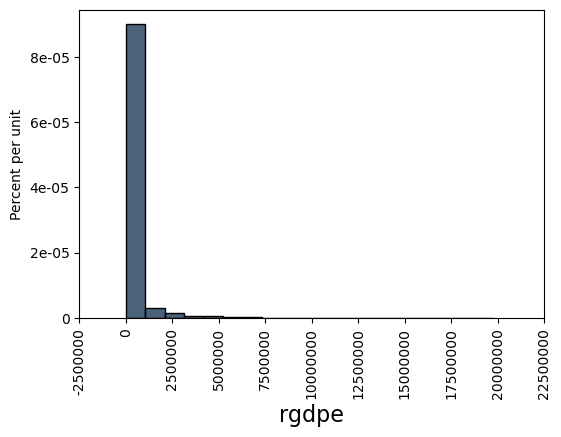

In [60]:
bins = np.arange(minimum_rgdpe, maximum_rgdpe+0.01, (((maximum_rgdpe+0.01)-minimum_rgdpe)/20))
data.hist('rgdpe', bins=bins)

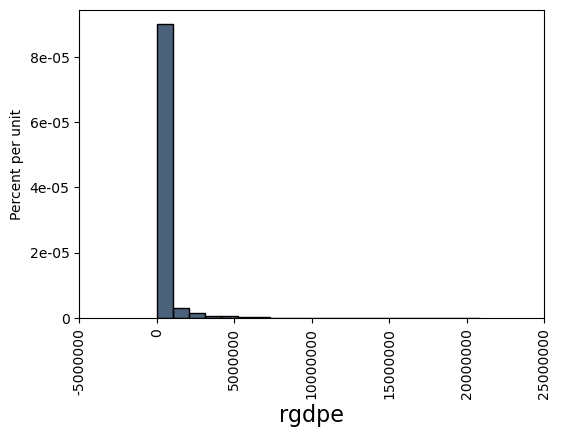

In [61]:
data.hist('rgdpe', bins=20)

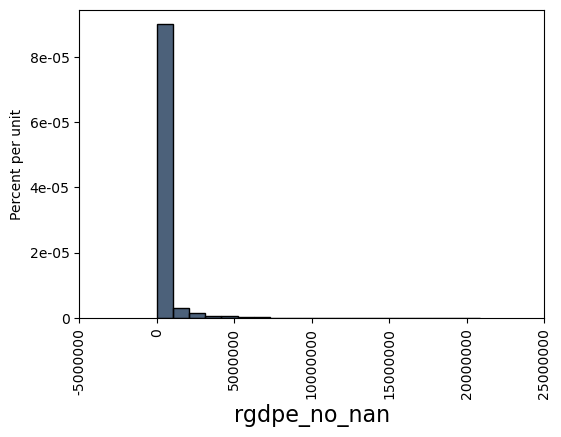

In [62]:
hmmm = Table().with_column('rgdpe_no_nan', rgdpe_no_nan)
hmmm.hist(bins=20)

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

**Question 2.8.** Based on the summary statistics you calculated above, as well as the histogram you just created, do you observe anything of particular interest? Note that there is no 'correct' solution here, we just expect you to reasonably justify your choice.

_The first thing I noticed was the massive range in rgdpe between all nations, but also how masisve the difference between the mean and median is. When shown as a histogram however, it becomes clear that the large majority of values are relatively close together, at least when using 20 equally spaced bins. That being said, because there is such an astronomical range between the min and max rgdpe values, the size of each bin is more than a million, which seems like a rather large gap._

<!-- END QUESTION -->

### Let's explore the data further! We will evaluate employment levels in Canada and Mexico as a primer to the project you will be working on.

**Question 2.9** Calculate the mean, median, max, and min values of `emp` for both Canada and Mexico and assign them to the relevant variables below:

In [63]:
canada_data = data.where('country', are.equal_to('Canada'))

canada_emp = canada_data.column('emp')
mean_canada_emp = np.mean(canada_emp)
median_canada_emp = percentile(50, canada_emp)
min_canada_emp = min(canada_emp)
max_canada_emp = max(canada_emp)

mexico_data = data.where('country', are.equal_to('Mexico'))

mexico_emp = mexico_data.column('emp')
mean_mexico_emp = np.mean(mexico_emp)
median_mexico_emp = percentile(50, mexico_emp)
min_mexico_emp = min(mexico_emp)
max_mexico_emp = max(mexico_emp)

((mean_canada_emp, median_canada_emp, min_canada_emp, max_canada_emp), (mean_mexico_emp, median_mexico_emp, min_mexico_emp, max_mexico_emp))

((11.885714285714286, 11.0, 6.0, 19.0), (25.942857142857143, 23.0, 8.0, 55.0))

In [64]:
grader.check("q2_9")

q2_9 results: All test cases passed!

<!-- BEGIN QUESTION -->

**Question 2.10.** Based solely on the summary statistics you calculated, do you observe anything of particular interest? Do any of the similarities or differences have anything to do with the metric we are exploring, `emp`? Note that there is no 'correct' solution here, we just expect you to reasonably justify your choice.

_emp measures the "number of persons engaged (in millions)" so we expect to see more populous countries with higher values. There is nothing especially interesting to me in the emp values, other than noting how much range there is in the data set (Canada with a range of 13 million and Mexico with a range of 47 million). I think the more interesting data would be taking those numbers as a proportion of the population, giving us a per capita number that would help compare across countries more easily._

<!-- END QUESTION -->

### That's all! Get ready for a fun and insightful project!

---

## Credits

We would like to thank Professor Raymond Hawkins for his input and Lecture 4 of his Economics 100B course at UC Berkeley, which informed parts of this notebook.

Further, we reference the University of Groningen's Penn World Table 10.0 Dataset throughout this notebook:

Feenstra, Robert C., Robert Inklaar and Marcel P. Timmer (2015), "The Next Generation of the Penn World Table" American Economic Review, 105(10), 3150-3182, available for download at www.ggdc.net/pwt

## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

In [65]:
# Save your notebook first, then run this cell to export your submission.
grader.export(pdf=False)